# Project: Linear Regression Model for Predicting California House Prices

> > 👉🏾 Objective: Develop a linear regression neural network using PyTorch to predict house prices based on various features in the California Housing dataset.

## Dataset Information

The California Housing dataset provides information on median house values in various districts in California, along with other demographic and geographic data. 

This dataset, introduced by the U.S. Census, is often used for regression problems and is available in the `sklearn.datasets` module of Pytorch.

### Dataset Overview

The California Housing dataset contains the following attributes:

* `MedInc`: Median income in the district (in tens of thousands of dollars).
* `HouseAge`: Median house age in the district.
* `AveRooms`: Average number of rooms per household.
* `AveBedrms`: Average number of bedrooms per household.
* `Population`: Population in the district.
* `AveOccup`: Average number of occupants per household.
* `Latitude`: Latitude of the district's location.
* `Longitude`: Longitude of the district's location.

#### Target Variable

The target variable, which we aim to predict using linear regression, is:

`MedHouseVal`: Median house value for households within a district (in hundreds of thousands of dollars).

#### Pytorch Implementation of the Data Set

We need to import `fetch_california_housing `from `sklearn.datasets` to load the California Housing dataset.

Here is a sample code that imports the required data into Pytorch

In [3]:
# Import necessary modules
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Define the attribute names
feature_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms", 
    "Population", "AveOccup", "Latitude", "Longitude"
]

# Function to print a sample data item with attribute names
def print_sample_data(X, y, feature_names, sample_index=0):
    # Select the sample at the specified index
    X_sample = X[sample_index]
    y_sample = y[sample_index]
    
    # Print each feature with its attribute name
    print("Sample data item with attributes:")
    for feature_name, value in zip(feature_names, X_sample):
        print(f"{feature_name}: {value}")
    
    print(f"\nTarget (Median House Value): {y_sample}")

# Print the first sample data item
print_sample_data(X, y, feature_names, sample_index=0)
print("*******************************")
# Print the second sample data item
print_sample_data(X, y, feature_names, sample_index=1)

Sample data item with attributes:
MedInc: 8.3252
HouseAge: 41.0
AveRooms: 6.984126984126984
AveBedrms: 1.0238095238095237
Population: 322.0
AveOccup: 2.5555555555555554
Latitude: 37.88
Longitude: -122.23

Target (Median House Value): 4.526
*******************************
Sample data item with attributes:
MedInc: 8.3014
HouseAge: 21.0
AveRooms: 6.238137082601054
AveBedrms: 0.9718804920913884
Population: 2401.0
AveOccup: 2.109841827768014
Latitude: 37.86
Longitude: -122.22

Target (Median House Value): 3.585


### Curating the Data

Before using the dataset, we need to process it: transform it into a batch of tensors.

#### Why Normalize the Data?

Normalization is essential for the following reasons:

* Consistent Scale: Each feature (e.g., income, population, latitude) has different scales. Standardizing these features to a mean of 0 and a standard deviation of 1 ensures that each feature contributes proportionally to the model’s learning, preventing some variables from dominating others.

* Improved Training Stability: Neural networks, especially those using gradient-based optimization, converge faster and more reliably when inputs are normalized. Without normalization, larger values can lead to large gradients that destabilize the training process.

* Reduced Bias in Coefficients: Normalizing also helps ensure that each feature is treated equally by the model, preventing any inherent bias toward features with larger values.

##### Pytorch Code

* We will Import `train_test_spli`t from `sklearn.model_selection` to split the data into training and testing sets.
We will Import `Standard Scaler`t from `sklearn.preprocessing` to split the data into training and testing sets.

##### Why Splitting the Data?

Splitting the data into training and testing sets is a critical step in machine learning, as it allows us to evaluate the model’s performance on unseen data. Here are the key reasons for splitting the California Housing dataset in this context:

1. Model Evaluation on Unseen Data
   - A fundamental goal of machine learning is to generalize well on new, unseen data. By splitting the dataset, we train the model on one portion (the training set) and assess its performance on another (the test set). This helps us estimate how well the model might perform on real-world data.

2. Avoiding Overfitting
   - Without a test set, there’s a risk that the model will "memorize" the training data instead of learning meaningful patterns (a problem called overfitting). Testing on a separate dataset lets us verify that the model captures the underlying trends rather than just fitting to the noise in the training data.

3. Hyperparameter Tuning and Model Selection
   - Often, we need to try different model architectures, hyperparameters, or regularization methods to find the best performing model. Using a test set allows us to evaluate these choices objectively, helping us choose the model and settings that generalize well.

4. Performance Metrics
   - A dedicated test set provides unbiased performance metrics. For instance, in regression tasks like this housing dataset, we might want metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE). These metrics calculated on the test set are good indicators of expected performance in real-world applications.

#### Transforming dataset into Tensors

This last step is required to feed the data to a neural network.

#### Practical Example in the Provided Code

In this code:
- `train_test_split` with `test_size=0.2` splits 80% of the data for training and 20% for testing.
- `train_loader` and `test_loader` then serve as data sources for training and evaluating the model separately.

This separation enables a realistic assessment of model performance and facilitates selecting the best model and settings.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
# Standardize the features and target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create TensorDataset and DataLoader for training and testing
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32)

### Question 1

Use the variables `train_loader` and `test_loader`, to write code to:

* Retrieve the first batch of data from `train_loader`.

* Print the shapes of the feature tensor `X_batch` and target tensor `y_batch` for that batch to verify correctness.

Your output should look like this:

![output1](Output1.png)


Please write your code below.

In [5]:
# Write your code here

# Retrieve the first batch of data
X_batch, y_batch = next(iter(train_loader))
#Print the shape of X_batch and of y_batch
print("Shape of X_batch: ",X_batch.shape)
print("Shape of y_batch: ",y_batch.shape)

Shape of X_batch:  torch.Size([32, 8])
Shape of y_batch:  torch.Size([32])


## Define the class LinearRegressionModel

> In this section we define the class `LinearRegressionModel` class.


### Question 2

In this exercise, you'll define a class `LinearRegressionModel` that inherits from `torch.nn.Module`. This class will represent a simple linear regression model using PyTorch's neural network module.

* **Objective:** Use PyTorch's `nn.Linear` layer to create a linear regression model that can take in a set of input features and map them to a single output value. This is useful for predicting continuous values (e.g., predicting house prices based on size, age, location, etc.).

Recall some basic info about torch.nn.Linear
* Class: `torch.nn.Linear`
* Module: `torch.nn`
The `torch.nn.Linear` class represents a fully connected (or dense) layer, also known as a linear layer. This layer applies a linear transformation to the incoming data using the formula:

$$
y = xW^T + b
$$

where:
- $ x $ is the input,
- $W$ is the weight matrix,
- $ b$ is the bias vector.

[Look](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) into the API for `torch.nn.linear` to see how you initialize layers for that class.

* **Instructions:**
  1. Define a class named `LinearRegressionModel` that inherits from `torch.nn.Module`.
  2. Inside the class, initialize a single `nn.Linear` layer in the `__init__` method, which takes in the number of input features (`input_dim`) and outputs a single value.
  3. Implement the `forward` method, which defines the forward pass of the model. This method should take an input tensor `x` and return the output of the `nn.Linear` layer.

* **Hint:** The `nn.Linear` layer performs a linear transformation using weights and bias, i.e., `output = x * weight + bias`. By setting the `out_features` argument to 1 in the `nn.Linear` layer, you're ensuring the model outputs a single continuous prediction for each input sample.

Write your code below

In [6]:
# Write your code here

from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_features, output_features=1):
        # Define the initializator using the corresponding one for nn.Linear
        super().__init__()
        self.linear = nn.LazyLinear(output_features)

    def forward(self, x):
        #Define the forwarrd pass with input x
        return self.linear(x)
    


### Question 3

After defining the `LinearRegressionModel` class, you'll now write code to:

1. **Initialize the Model:** Create an instance of `LinearRegressionModel` called `model` and ensure that it has the correct input dimension.
   * Use `X.shape[1]` as the input dimension, where `X` is your dataset with features. This ensures the model knows how many features to expect in each sample.
   
2. **Verify the Model's Output Shape:** Pass a sample batch of data (e.g., `X_batch` from Question 1) through the model to ensure that the output shape matches what you'd expect.
   * When you pass `X_batch` (a sample batch of your input data) through the model, it should return predictions with the same number of rows as `X_batch`, but with only one column, since this is a single-output linear regression model.
   
3. **Print the Output Shape:** After obtaining the output from the model, use `print` to display the shape of the output tensor to verify it matches the expected shape.

The output of your code should be something like this (the shape should be the same, the other values not since they correspond to output of the model for the batch input, and those  depend on the random assigment of the weights ):

![output2](Output2.png)

Write your code below

In [7]:
# Write your code here

# Initialize the model
input_features = X.shape[1]
model = LinearRegressionModel(input_features)

# Pass a batch through the model to verify output shape
X = X_batch
y_hat = model(X)

# Print the output shape and the output batch
print(y_hat.shape)
print(y_hat)


torch.Size([32, 1])
tensor([[-0.3866],
        [-0.0542],
        [ 0.1352],
        [ 0.2114],
        [ 0.3163],
        [ 0.4983],
        [-0.1779],
        [-0.8946],
        [-0.3630],
        [ 0.0704],
        [-0.8580],
        [-0.5582],
        [-0.3896],
        [-0.4940],
        [-0.3690],
        [-0.2837],
        [-0.8333],
        [ 0.3048],
        [ 0.9007],
        [-0.5305],
        [ 0.3927],
        [-0.3488],
        [ 0.4452],
        [-0.5494],
        [-0.3636],
        [ 2.0084],
        [-0.7371],
        [ 0.7144],
        [-0.4066],
        [-0.3889],
        [ 0.6491],
        [-0.0892]], grad_fn=<AddmmBackward0>)


## Define the Loss Function and Optimizer

In this section, you'll define the loss function and optimizer, which are essential for training the linear regression model.

### Question 4

1. **Define the Loss Function:**
   * Use `nn.MSELoss` as the loss function, which is commonly used for regression tasks.
   * The Mean Squared Error (MSE) loss measures the average squared difference between the predicted and actual values, which helps in minimizing prediction errors during training.
   * you can check the API of the `nn.MSEloss` function [here](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

2. **Set Up the Optimizer:**
   * Use `torch.optim.SGD` as the optimizer for updating the model parameters during training.
   * Set the learning rate (`lr`) to 0.001, which controls how much the optimizer adjusts the weights with each step.
   * Initialize the optimizer to work with the parameters of your model, which we defined in Question 3 above as the variable `model`, which you can access with `model.parameters()`in the `optim.SGD call`.

* **Code Outline:**
  - Import `torch.optim` as `optim`.
  - Define `criterion` as `nn.MSELoss()`.
  - Define `optimizer` as a call to `optim.SGD()` with the right parameters.
  

This setup will prepare the model for training, allowing it to minimize the MSE loss through gradient descent.

Write your code below



In [8]:
#Write your code here

import torch.optim as optim

# Define the loss function, call it criterion and define the optimizer
criterion = nn.MSELoss()
params = model.parameters()
lr = 0.001
optimizer = optim.SGD(params, lr)
    

### Question 5

After defining the loss function and optimizer, write code to:

* Calculate the loss for the predictions from the outputs of `model(X_batch)` (from question 1) against `y_batch`.

* Print the computed loss to verify the setup is correct.

Write your answer below

In [9]:
# Write your code here

#Calculate the output of the model with input X.batch. Call the output prediction
prediction = y_hat
#calculate the loss using the criterion function (loss function) evaluated with prediction and y-batch
loss = criterion(prediction.reshape(-1,1), y_batch.reshape(-1,1))
#print the value of the loss just calculated
print(loss)

tensor(1.0932, grad_fn=<MseLossBackward0>)


## Train the Model

Implement a training loop over multiple epochs, updating model weights using backpropagation.

### Question 6

* Train the model for 100 epochs.

* Record the training loss at each epoch and plot it at the end.

You should see something like this (the number may not be the same because we are running the training starting with random assigments of the parameters):

![output3](Output3.png)


Write your answer below

Epoch [10/100], Loss: 0.4130


Epoch [20/100], Loss: 0.3948


Epoch [30/100], Loss: 0.3906


Epoch [40/100], Loss: 0.3899


Epoch [50/100], Loss: 0.3896


Epoch [60/100], Loss: 0.3896


Epoch [70/100], Loss: 0.3895


Epoch [80/100], Loss: 0.3895


Epoch [90/100], Loss: 0.3894


Epoch [100/100], Loss: 0.3895


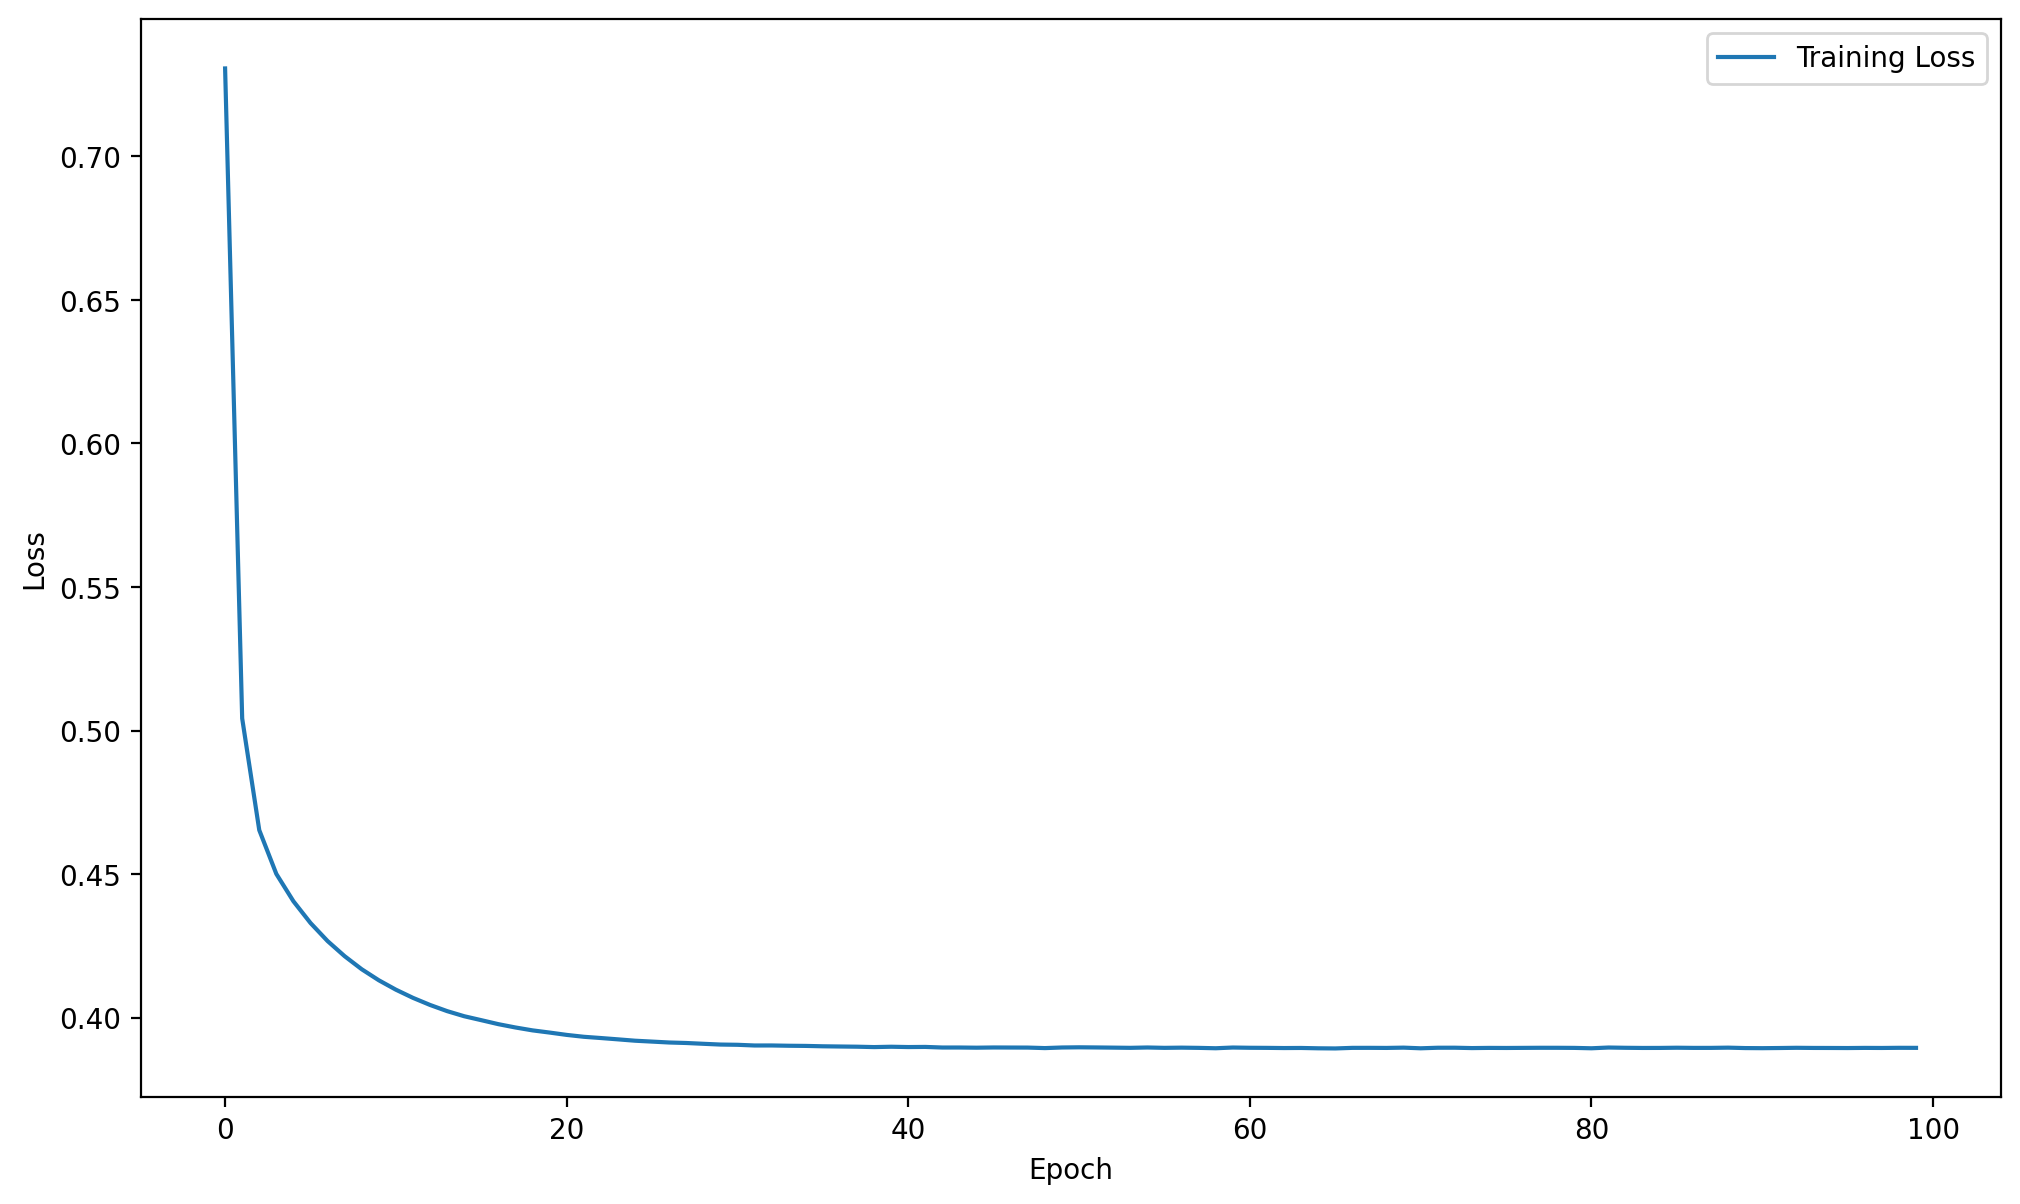

In [10]:
# Write your code here
import matplotlib.pyplot as plt

# Set the number of epochs and set train-losses to the empty array.
epochs = 100
train_losses = []  # List to record the training loss for each epoch

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # Initialize running loss for each epoch
    
    # Loop over batches in the train_loader
    for inputs, targets in train_loader:
                      # Clear the gradients from the previous batch
        optimizer.zero_grad()
                    # Forward pass: compute model predictions
        y_hat = model(inputs)
                      # Compute the loss for this batch
        loss = criterion( targets.reshape(-1,1),y_hat.reshape(-1,1))
                     # Backward pass: calculate gradients
        loss.backward()
                     # Update model parameters based on gradients
        optimizer.step()
                      # Accumulate loss for this epoch
        running_loss += loss.item()
    #end of inner loop
    # Calculate and record the average loss for the current epoch
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}")

# Plot the training loss over epochs
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>IMPORTANT</b> If your code is correct the neural network must have an error less than $0.6$.
</div>

We could improve the prediction accuracy by increasing the number of epochs, and doing other things. But at this point we will keep the error obtained and we will pass to the validation phase.


## Evaluate the Model

In this section, you'll evaluate the performance of your trained model on a test dataset.

### Question 7

We will evaluate the model’s total loss on the test dataset using the mean_square_error() from the module sklearn.metrics (find how to do this on the internet). Do not forget to import it.

1. **Set the Model to Evaluation Mode:**
   * Use `model.eval()` to set the model to evaluation mode. This ensures that any layers that behave differently during training (like dropout) are correctly configured for inference.

2. **Disable Gradient Computation:**
   * Use `torch.no_grad()` to disable gradient calculations, which saves memory and speeds up computation since we are only performing inference.

3. **Generate Predictions on the Test Data:**
   * Pass `X_test` (your test dataset inputs) through the model to get predictions.
   * Use `.flatten()` on the output to ensure the predictions have the same shape as `y_test` (your target values), which is necessary for calculating mean squared error.

4. **Calculate Mean Squared Error (MSE):**
   * Use `mean_squared_error()` from `sklearn.metrics` to calculate the model’s MSE on the test dataset. This function provides an easy way to compute MSE between the predictions and true labels (`y_test`).
   * If you're unfamiliar with `mean_squared_error()` or `sklearn.metrics`, try searching online for "sklearn mean_squared_error" for usage details and examples.

5. **Display the Test MSE:**
   * Use `print` to output the test MSE, rounding to four decimal places to keep the results concise.

Write your answer below.

In [11]:
# Write answer here
from sklearn.metrics import mean_squared_error

# Set the model to evaluation mode to disable any training-specific features
model.eval()

# Disable gradient computation to save memory and computation during inference
with torch.no_grad():
    # Generate predictions on the test data
                  # Flatten to ensure consistency with target shape
    y_predicted = model(X_test)
    y_predicted.flatten()
    # Calculate Mean Squared Error (MSE) on the test set
    error = mean_squared_error(y_test, y_predicted)
#end of loop
# Print the evaluation metrics
print(error)

0.41983175


## Experiment with Hyperparameters

Analyze the effect of different learning rates on model performance.

### Question 8

* Change the learning rate to 0.0001 and 0.01, re-train the model, and compare the training and test MSE.

* Discuss the impact of learning rate on model convergence and stability.

Write your answer below.

Epoch [10/100], Loss: 2372.6659


Epoch [20/100], Loss: 73409383480.4806


Epoch [30/100], Loss: 7592126244774516736.0000


Epoch [40/100], Loss: 6915894929682333947658240.0000


Epoch [50/100], Loss: 6918676630764683450846289076420608.0000


Epoch [60/100], Loss: inf


Epoch [70/100], Loss: inf


Epoch [80/100], Loss: inf


Epoch [90/100], Loss: inf


Epoch [100/100], Loss: inf


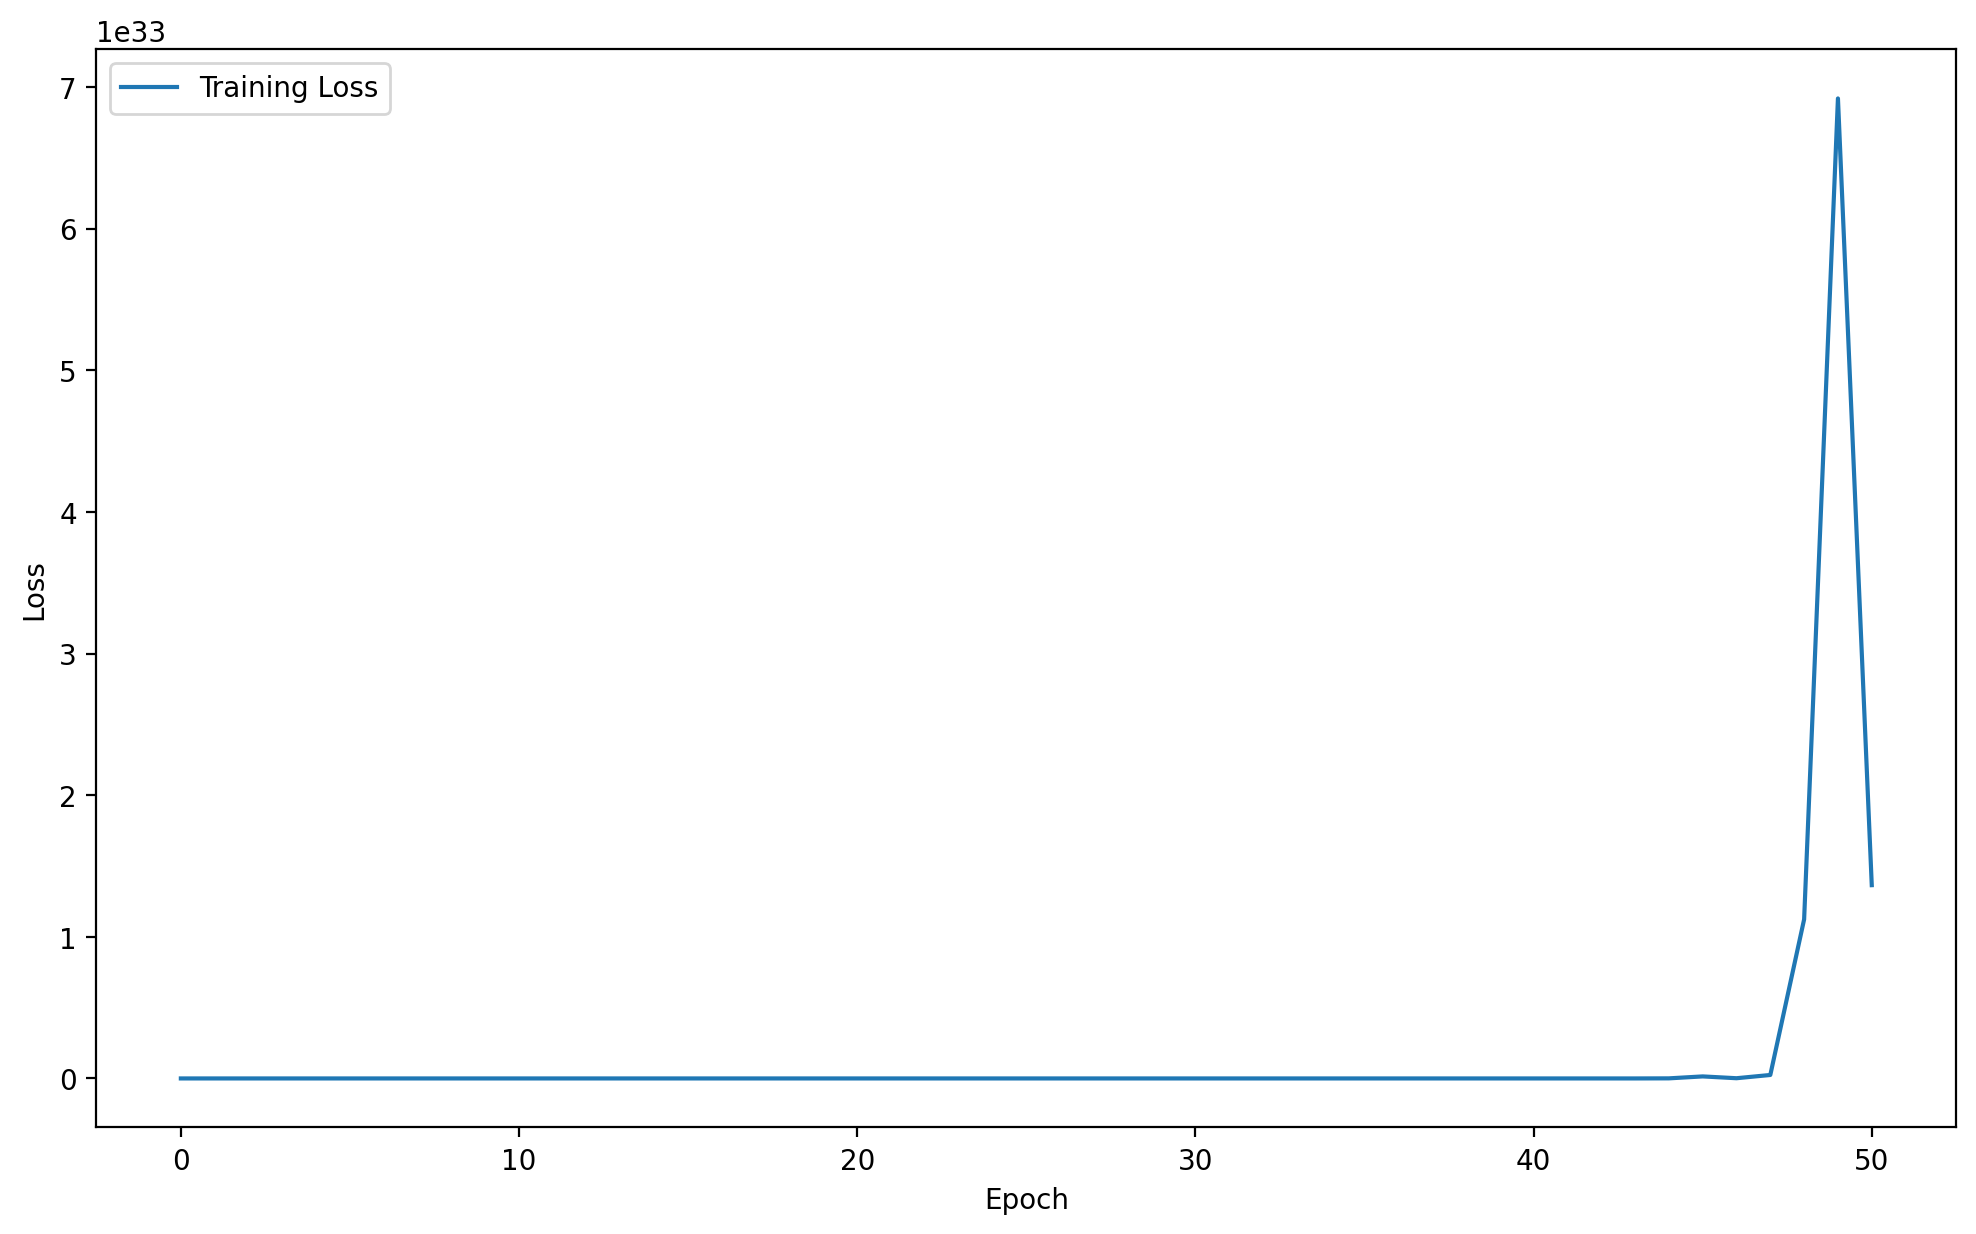

In [12]:
#Write your code here for the learning rate 0.01

#Redefine the optimizer with the new learning rate
params = model.parameters()
lr = 0.01
optimizer1 = optim.SGD(params, lr)

# rerun your training loop with the new learning rate above.
import matplotlib.pyplot as plt
model.train()
# Set the number of epochs and set train-losses to the empty array.
epochs = 100
train_losses = []  # List to record the training loss for each epoch

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # Initialize running loss for each epoch
    
    # Loop over batches in the train_loader
    for inputs, targets in train_loader:
                      # Clear the gradients from the previous batch
        optimizer1.zero_grad()
                    # Forward pass: compute model predictions
        y_hat = model(inputs)
                      # Compute the loss for this batch
        loss = criterion( targets.reshape(-1,1),y_hat.reshape(-1,1))
                     # Backward pass: calculate gradients
        loss.backward()
                     # Update model parameters based on gradients
        optimizer1.step()
                      # Accumulate loss for this epoch
        running_loss += loss.item()
    #end of inner loop
    # Calculate and record the average loss for the current epoch
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}")

# Plot the training loss over epochs
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch [10/100], Loss: inf


Epoch [20/100], Loss: inf


Epoch [30/100], Loss: inf


Epoch [40/100], Loss: inf


Epoch [50/100], Loss: inf


Epoch [60/100], Loss: inf


Epoch [70/100], Loss: inf


Epoch [80/100], Loss: inf


Epoch [90/100], Loss: inf


Epoch [100/100], Loss: inf


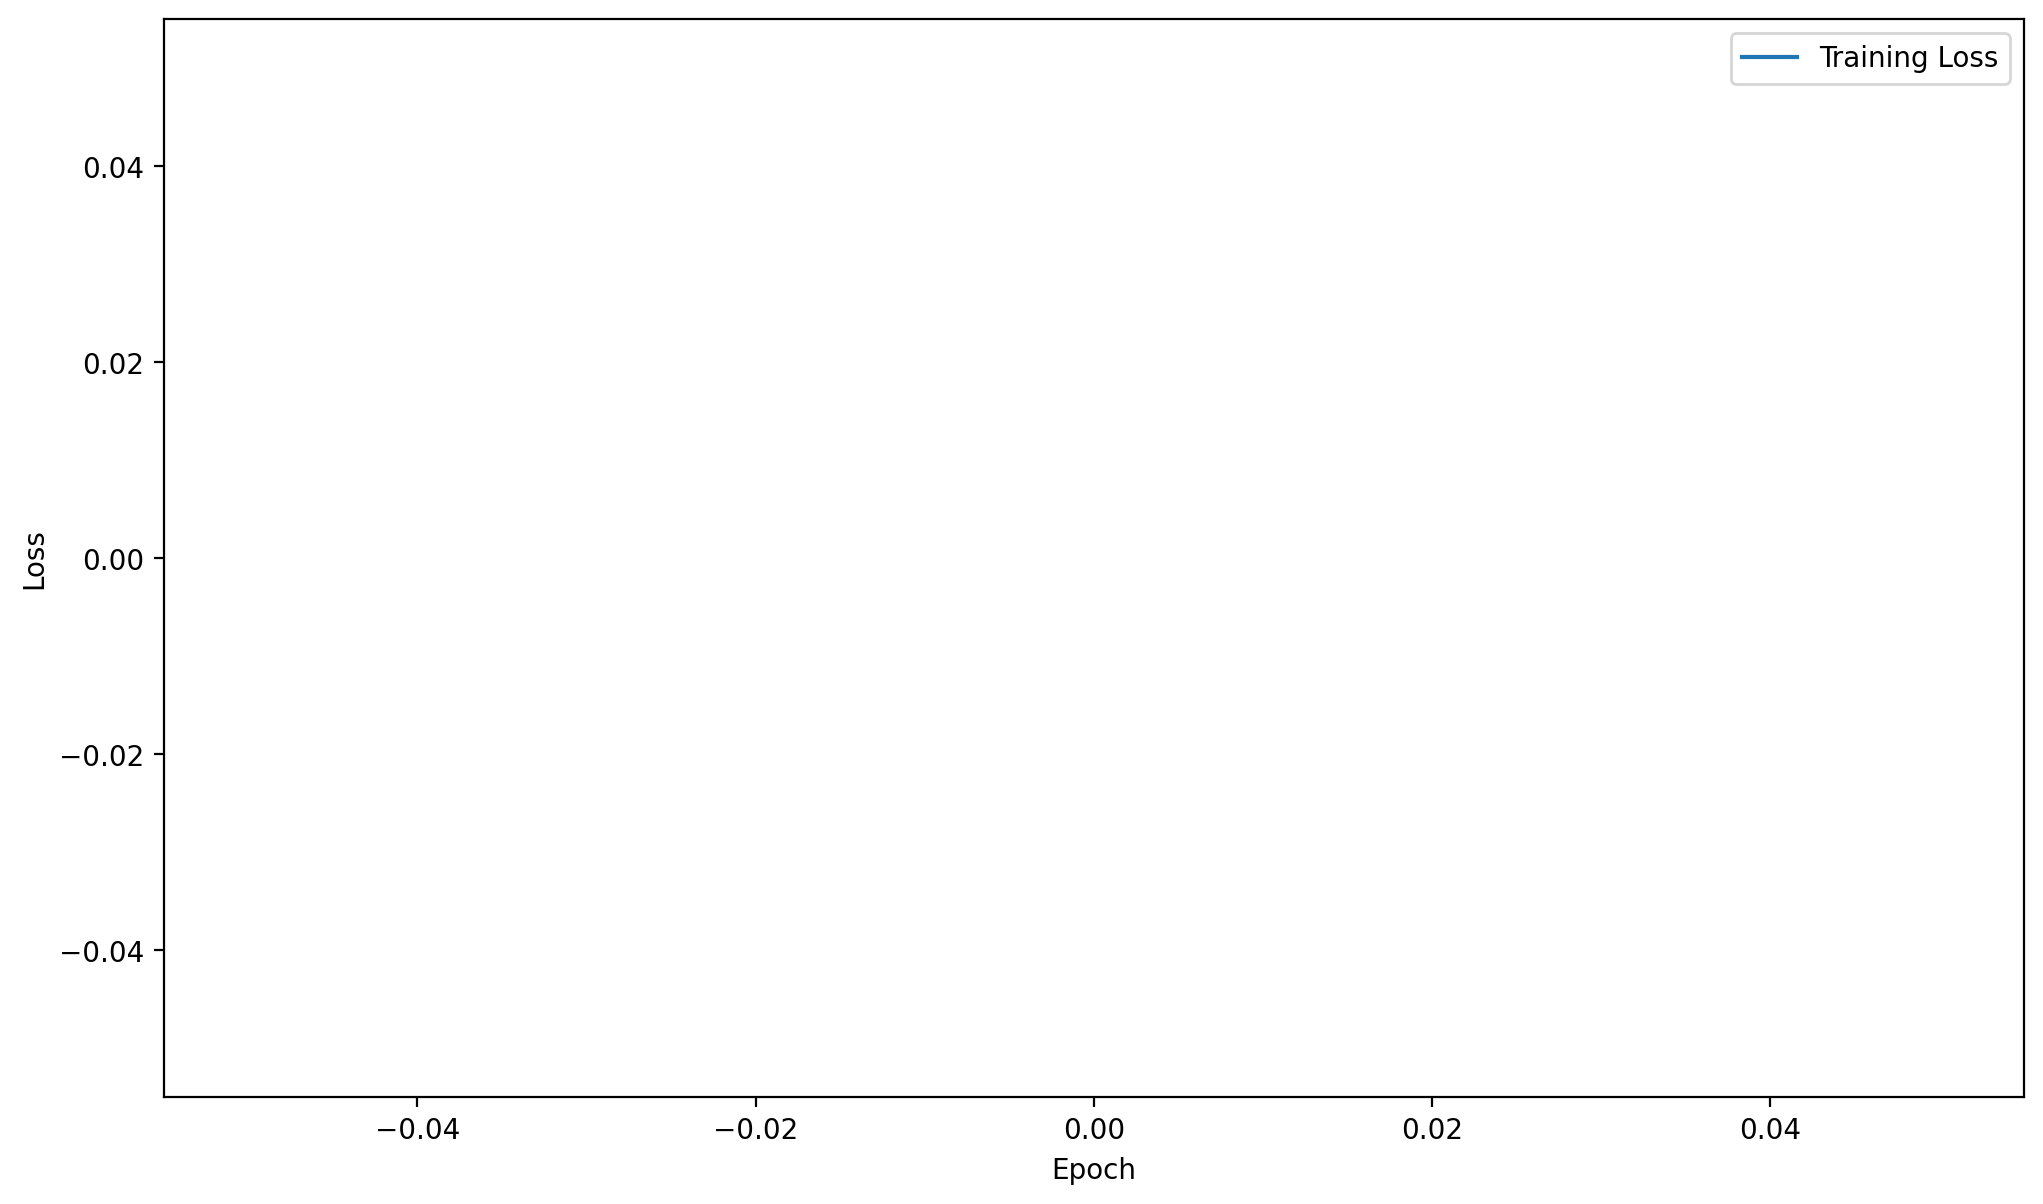

In [13]:
#Write your code here for the learning rate 0.0001

#Redefine the optimizer with the new learning rate
params = model.parameters()
lr = 0.0001
optimizer2 = optim.SGD(params, lr)

# rerun your training loop with the new learning rate above.
import matplotlib.pyplot as plt
model.train()
# Set the number of epochs and set train-losses to the empty array.
epochs = 100
train_losses = []  # List to record the training loss for each epoch

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # Initialize running loss for each epoch
    
    # Loop over batches in the train_loader
    for inputs, targets in train_loader:
                      # Clear the gradients from the previous batch
        optimizer2.zero_grad()
                    # Forward pass: compute model predictions
        y_hat = model(inputs)
                      # Compute the loss for this batch
        loss = criterion( targets.reshape(-1,1),y_hat.reshape(-1,1))
                     # Backward pass: calculate gradients
        loss.backward()
                     # Update model parameters based on gradients
        optimizer2.step()
                      # Accumulate loss for this epoch
        running_loss += loss.item()
    #end of inner loop
    # Calculate and record the average loss for the current epoch
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {average_loss:.4f}")

# Plot the training loss over epochs
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Explanation of the Results

Write your explanation here.

In this example, the learning rate of 0.01 quickly approaches infinity rather than converging to 0. The learning rate of 0.0001 approaches 0 but slower than 0.001 so 0.001 seems to be the ideal rate for this specific example.


**END OF WORKSHEET**

Make sure that you answered all the questions on time. This completed `Jupyter Notebook` will be collected and graded. 

Once the `Jupyter Notebook` is collected it can not be modified.